# Protein amino acid proximity (contact maps)
PDB files contain all the information regarding the structure of proteins. This includes the location of each atom within a molecule. As a result we can use pdb files to determine proximity matrices for amino acids belonging to different proteins within protein complexes.

I will focus specifically on two examples that I care about: Gyrase and RNA polymerase. I will base my approach on the 'Using Python for macromolecular structures' chapter in <a href="http://www.cambridge.org/do/academic/subjects/life-sciences/genomics-bioinformatics-and-systems-biology/python-programming-biology-bioinformatics-and-beyond?format=PB">Python Programing for Biology</a> and this <a href="http://www2.warwick.ac.uk/fac/sci/moac/people/students/peter_cock/python/protein_contact_map/">blog post by Peter Cock at Warwick</a>.

## Gyrase
The structure of the <em>Staphylococcus auerus</em> gyrase has been solved by <a href="http://www.nature.com/ncomms/2015/151207/ncomms10048/pdf/ncomms10048.pdf">Chen et al</a>. The code for the structure with moxifolxacin has been deposited with the pdb code: <strong>5CDQ</strong>. 

There is now a holoenzyme for <em>M. tuberculosis</em> as well published by <a href="http://www.pnas.org/content/113/7/1706">Blower et al</a>. The code for the structure with moxifloxacin has been deposited with the pdb code: <strong>5BS8</strong>.

In addition, <a href="http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0012245">Piton et al</a> have addressed the structural implication of resistance to the enzyme.

In [1]:
#set up kernel
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as ss
import numpy as np
import Bio.PDB
import requests as rq

mpl.rcParams['font.sans-serif']='Helvetica'
mpl.rcParams['legend.numpoints'] = 1

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

/Users/Zuco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### SAU gyrase
I've downloaded 5CDQ.pdb into a new project folder - 160229_pdb_explore. So start by parsing the pdb file.

In [3]:
#Staph aureus
pdb_code = '5CDQ'
pdb_filename = '../160229_pdb_explore/5CDQ.pdb'

structure = Bio.PDB.PDBParser().get_structure(pdb_code, pdb_filename)
model = structure[0]

In [7]:
distance_matrix = []
gyrA_residue = {}
gyrB_residue = {}
for residue in model['A']:
    if residue.has_id('CA'):
        atomA = residue['CA']
        gyrA_residue[residue.get_id()[1]] = {'RESIDUE': residue.resname, 
                                             'CA_COORDINATES': residue['CA'].get_coord()}
        _atomA_dist = []
        for residueB in model['B']:
            if residueB.has_id('CA'):
                atomB = residueB['CA']
                _atomA_dist.append(atomA-atomB)
                gyrB_residue[residueB.get_id()[1]] = {'RESIDUE': residueB.resname, 
                                                      'CA_COORDINATES': residueB['CA'].get_coord()}
        distance_matrix.append(_atomA_dist)

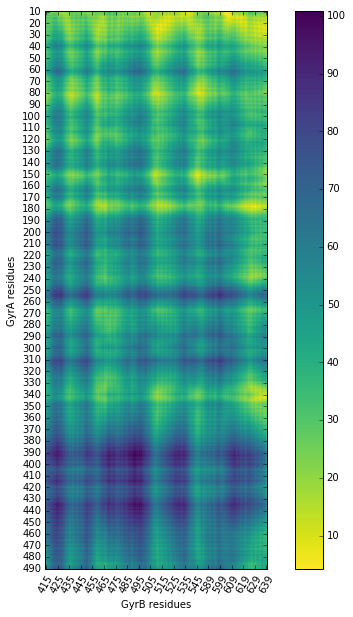

In [10]:
plt.figure(figsize=(10,10))
distance_matrix = np.array(distance_matrix)
plt.imshow(distance_matrix, interpolation='none', cmap='viridis_r')
plt.colorbar()
plt.xlabel('GyrB residues')
plt.yticks(np.arange(0,len(gyrA_residue),10), 
           [sorted(gyrA_residue.keys())[x] for x in np.arange(0,len(gyrA_residue),10)])
plt.xticks(np.arange(0,len(gyrB_residue),10), 
           [sorted(gyrB_residue.keys())[x] for x in np.arange(0,len(gyrB_residue),10)], rotation=60)
plt.ylabel('GyrA residues')

Based on these data the structure of the molecule is quite complex... seems like the C-terminal portion of GyrA is quite far away from most of GyrB...

What is the overall distribution of distances?

(array([    0.,     0.,     0.,     0.,     5.,    15.,    20.,    27.,
           48.,    88.,   101.,   126.,   163.,   193.,   220.,   274.,
          284.,   308.,   366.,   371.,   436.,   477.,   491.,   615.,
          654.,   773.,   791.,   912.,   972.,  1052.,  1168.,  1247.,
         1312.,  1439.,  1564.,  1554.,  1683.,  1737.,  1804.,  1888.,
         1886.,  1976.,  2110.,  2123.,  2104.,  2151.,  2236.,  2214.,
         2133.,  2164.,  2239.,  2163.,  2061.,  2111.,  2055.,  1960.,
         2033.,  1900.,  1877.,  1813.,  1815.,  1748.,  1539.,  1596.,
         1498.,  1288.,  1316.,  1216.,  1084.,  1060.,  1018.,   947.,
          852.,   809.,   797.,   771.,   658.,   640.,   567.,   550.,
          525.,   419.,   407.,   407.,   323.,   290.,   253.,   208.,
          189.,   149.,   110.,    98.,    67.,    57.,    38.,    24.,
           24.,    12.,    11.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21

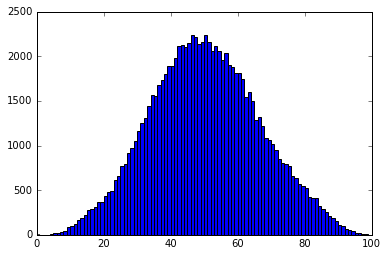

In [11]:
plt.hist(distance_matrix.flatten(),bins=np.arange(100))

What if we take two residues that are clearly different in their interaction based on the heat map above?

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   3.,   2.,
          2.,   4.,   3.,   7.,   5.,   3.,   3.,   3.,   3.,   4.,   3.,
          4.,   1.,   9.,   2.,   4.,   8.,   7.,   2.,  11.,   5.,  10.,
          3.,   8.,   7.,   5.,   8.,   7.,   4.,   9.,   8.,  10.,   9.,
          3.,  12.,   8.,   4.,   5.,   4.,   5.,   3.,   3.,   4.,   1.,
          4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 

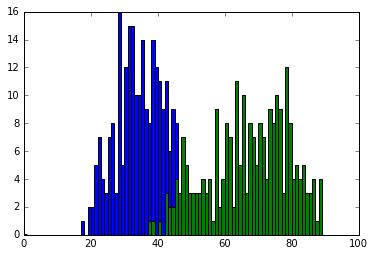

In [70]:
plt.hist(distance_matrix[79],bins=np.arange(100))
plt.hist(distance_matrix[378],bins=np.arange(100))

Briefly, can I use this to see which residues DNA binds to (chain W)?

In [41]:
DNA_A_matrix = []
for residue in model['W']:
    if residue.has_id('C5'): 
        atomM = residue['C5']
        _atomM_dist = []
        for residueA in model['A']:
            if residueA.has_id('CA'):
                atomA = residueA['CA']
                _atomM_dist.append(atomM-atomA)
        DNA_A_matrix.append(_atomM_dist)
        DNA_A_matrix.append(_atomM_dist)


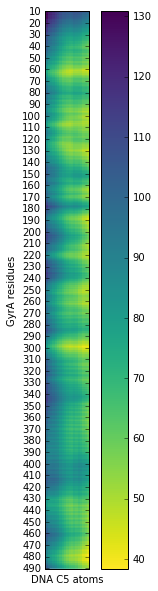

In [42]:
plt.figure(figsize=(4,10))
DNA_A_matrix = np.array(DNA_A_matrix)
plt.imshow(DNA_A_matrix.T, interpolation='none', cmap='viridis_r')
plt.colorbar()
plt.ylabel('GyrA residues')
plt.yticks(np.arange(0,len(gyrA_residue),10), 
           [sorted(gyrA_residue.keys())[x] for x in np.arange(0,len(gyrA_residue),10)])
plt.xticks([])
plt.xlabel('DNA C5 atoms')

In [44]:
DNA_B_matrix = []
for residue in model['W']:
    if residue.has_id('C5'): 
        atomM = residue['C5']
        _atomM_dist = []
        for residueB in model['B']:
            if residueB.has_id('CA'):
                atomB = residueB['CA']
                _atomM_dist.append(atomM-atomB)
        DNA_B_matrix.append(_atomM_dist)
        DNA_B_matrix.append(_atomM_dist)


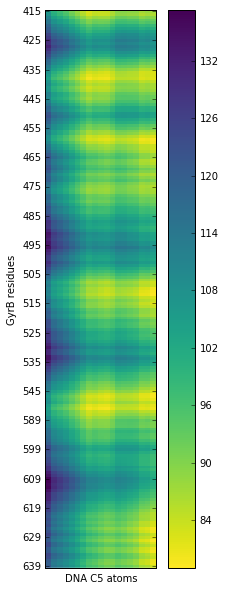

In [46]:
plt.figure(figsize=(4,10))
DNA_B_matrix = np.array(DNA_B_matrix)
plt.imshow(DNA_B_matrix.T, interpolation='none', cmap='viridis_r')
plt.colorbar()
plt.ylabel('GyrB residues')
plt.yticks(np.arange(0,len(gyrB_residue),10), 
           [sorted(gyrB_residue.keys())[x] for x in np.arange(0,len(gyrB_residue),10)])
plt.xticks([])
plt.xlabel('DNA C5 atoms')

### MTB gyrase
I've downloaded 5BS8.pdb and will parse it as above.

In [49]:
#Staph aureus
pdb_code = '5BS8'
pdb_filename = '../160229_pdb_explore/5BS8.pdb'

structure = Bio.PDB.PDBParser().get_structure(pdb_code, pdb_filename)
model = structure[0]

distance_matrix = []
gyrA_residue = {}
gyrB_residue = {}
for residue in model['A']:
    if residue.has_id('CA'):
        atomA = residue['CA']
        gyrA_residue[residue.get_id()[1]] = {'RESIDUE': residue.resname, 
                                             'CA_COORDINATES': residue['CA'].get_coord()}
        _atomA_dist = []
        for residueB in model['B']:
            if residueB.has_id('CA'):
                atomB = residueB['CA']
                _atomA_dist.append(atomA-atomB)
                gyrB_residue[residueB.get_id()[1]] = {'RESIDUE': residueB.resname, 
                                                      'CA_COORDINATES': residueB['CA'].get_coord()}
        distance_matrix.append(_atomA_dist)
        
distance_matrix = np.array(distance_matrix)

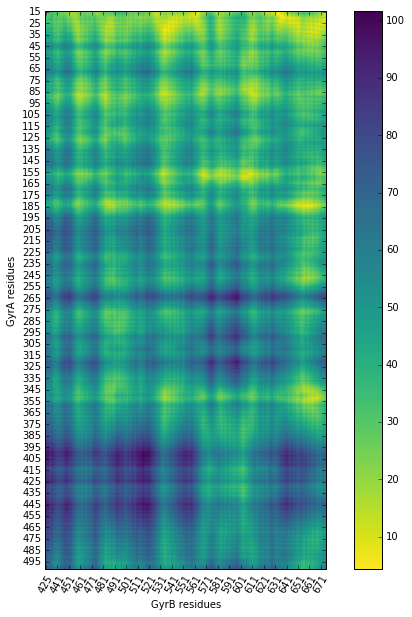

In [50]:
plt.figure(figsize=(10,10))
plt.imshow(distance_matrix, interpolation='none', cmap='viridis_r')
plt.colorbar()
plt.xlabel('GyrB residues')
plt.yticks(np.arange(0,len(gyrA_residue),10), 
           [sorted(gyrA_residue.keys())[x] for x in np.arange(0,len(gyrA_residue),10)])
plt.xticks(np.arange(0,len(gyrB_residue),10), 
           [sorted(gyrB_residue.keys())[x] for x in np.arange(0,len(gyrB_residue),10)], rotation=60)
plt.ylabel('GyrA residues')

In [51]:
gyrA_residue[94]

{'CA_COORDINATES': array([ 31.92099953,  19.97299957,  30.53700066], dtype=float32),
 'RESIDUE': 'ASP'}

Let's identify the closest GyrB residues to GyrA D94. First need to figure out what the index of D94 is in the distance matrix.

In [97]:
for ind,val in enumerate(sorted(gyrA_residue.keys())):
    if val == 94: 
        print(ind)
        print gyrA_residue[val]

79
{'RESIDUE': 'ASP', 'CA_COORDINATES': array([ 31.92099953,  19.97299957,  30.53700066], dtype=float32)}


OK, next figure out what the closest residues are to it...

In [83]:
D94_50 = np.array(sorted(gyrB_residue.keys()))[np.argsort(distance_matrix[79])[:50]]

In [84]:
D94_50

array([483, 484, 536, 482, 460, 535, 611, 614, 461, 534, 612, 462, 537,
       485, 615, 539, 459, 540, 532, 486, 481, 613, 463, 538, 610, 533,
       531, 487, 501, 480, 499, 500, 543, 464, 616, 458, 609, 465, 541,
       491, 542, 490, 656, 466, 502, 544, 652, 495, 530, 498])

How far is that?

In [86]:
distance_matrix[79].min()

17.834633

Calculate a binary matrix that tells me if a GyrB and GyrA residue are less than 25 apart...

In [87]:
distance_matrix2 = np.array(distance_matrix>25, dtype=int)

Plot which parts of GyrB are closest to the QRDR in GyrA (residues 74-113).

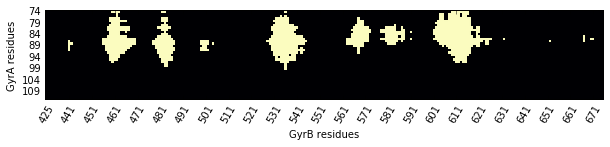

In [99]:
plt.figure(figsize=(10,10))
plt.imshow(distance_matrix2[59:98,:], interpolation='none', cmap='magma_r')
plt.xlabel('GyrB residues')
plt.yticks(np.arange(0,39,5), 
           [sorted(gyrA_residue.keys())[x] for x in np.arange(59,98,5)])
plt.xticks(np.arange(0,len(gyrB_residue),10), 
           [sorted(gyrB_residue.keys())[x] for x in np.arange(0,len(gyrB_residue),10)], rotation=60)
plt.ylabel('GyrA residues')

The QRDR in GyrA comprises, accoring to Piton et al residues 74-113 in GyrA and residues 461-499 in GyrB.

In [101]:
for ind,val in enumerate(sorted(gyrB_residue.keys())):
    if val == 499: 
        print(ind)
        print gyrB_residue[val]

68
{'RESIDUE': 'ASN', 'CA_COORDINATES': array([ 44.50099945,  25.15299988,   8.39299965], dtype=float32)}


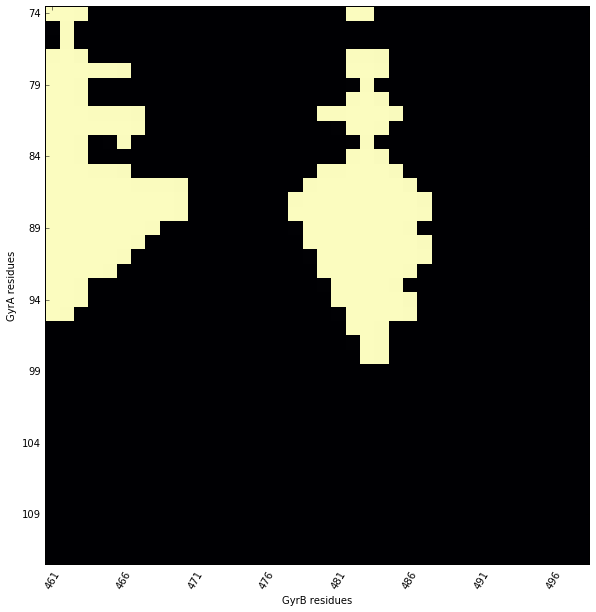

In [102]:
plt.figure(figsize=(10,10))
plt.imshow(distance_matrix2[59:98,30:68], interpolation='none', cmap='magma_r')
plt.xlabel('GyrB residues')
plt.yticks(np.arange(0,39,5), 
           [sorted(gyrA_residue.keys())[x] for x in np.arange(59,98,5)])
plt.xticks(np.arange(0,38,5), 
           [sorted(gyrB_residue.keys())[x] for x in np.arange(30,68,5)], rotation=60)
plt.ylabel('GyrA residues')

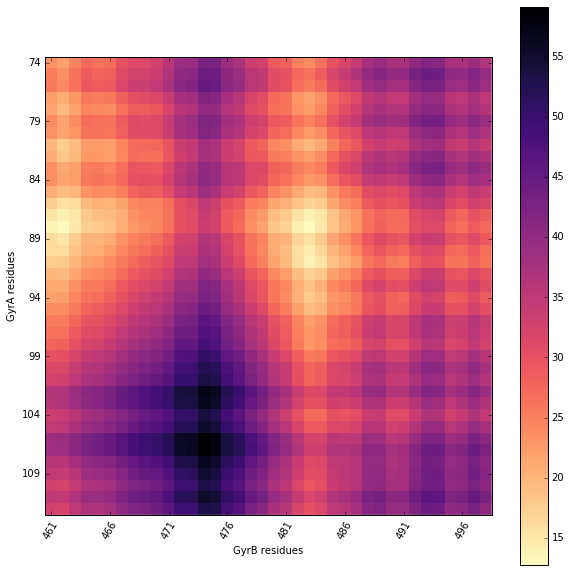

In [106]:
plt.figure(figsize=(10,10))
plt.imshow(distance_matrix[59:98,30:68], interpolation='none', cmap='magma_r')
plt.xlabel('GyrB residues')
plt.yticks(np.arange(0,39,5), 
           [sorted(gyrA_residue.keys())[x] for x in np.arange(59,98,5)])
plt.xticks(np.arange(0,38,5), 
           [sorted(gyrB_residue.keys())[x] for x in np.arange(30,68,5)], rotation=60)
plt.colorbar()
plt.ylabel('GyrA residues')

## RNA polymerase
It would be interesting to consider weather perhaps we can place the compensatory mutations for RIF-R strains in <em>M. tuberculosis</em> in the context of physical proximity...

### Thermus acquaticus
I will start with the <a href="http://www.ncbi.nlm.nih.gov/pubmed/11290327">Campbell et al</a> paper and their submitted structure for <em>Thermus aquaticus</em>: <strong>1I6V</strong>.

In [2]:
pdb_code = '1I6V'
pdb_filename = '../160229_pdb_explore/1I6V.pdb'

structure = Bio.PDB.PDBParser().get_structure(pdb_code, pdb_filename)
model = structure[0]

In [3]:
distance_matrixBA = []
distance_matrixBC = []
rpoA_residue = {}
rpoB_residue = {}
rpoC_residue = {}
for residue in model['C']:
    if residue.has_id('CA'):
        atomB = residue['CA']
        rpoB_residue[residue.get_id()[1]] = {'RESIDUE': residue.resname, 
                                             'CA_COORDINATES': residue['CA'].get_coord()}
        _atomA_dist = []
        _atomC_dist = []
        for residueA in model['A']:
            if residueA.has_id('CA'):
                atomA = residueA['CA']
                _atomA_dist.append(atomA-atomB)
                rpoA_residue[residueA.get_id()[1]] = {'RESIDUE': residueA.resname, 
                                                      'CA_COORDINATES': residueA['CA'].get_coord()}
        distance_matrixBA.append(_atomA_dist)
        for residueC in model['D']:
            if residueC.has_id('CA'):
                atomC = residueC['CA']
                _atomC_dist.append(atomC-atomB)
                rpoC_residue[residueC.get_id()[1]] = {'RESIDUE': residueC.resname, 
                                                      'CA_COORDINATES': residueC['CA'].get_coord()}
        distance_matrixBC.append(_atomC_dist)
distance_matrixBA = np.array(distance_matrixBA)
distance_matrixBC = np.array(distance_matrixBC)

In [4]:
rpoA_residues_key = sorted(rpoA_residue.keys())
rpoB_residues_key = sorted(rpoB_residue.keys())
rpoC_residues_key = sorted(rpoC_residue.keys())

The RRDR covers residues 507-533 (<em>E. coli</em> numbering). This corresponds to residues 387-413 in <em>Thermus aquaticus</em>. 

This corresponds to indices 385-412 in the dataframe and sorted keys for <em>taq</em> RpoB.

I have also tried to determine the position of most frequent RpoC mutations. Based on Comas et al there are compensatory mutations in regions of 430-435, many around 480-490, some around 516-527 and about 698. The positions in <em>taq</em> that map to those are 630-635, 684-694, 720-733 and 913-914.

For RpoA the key positions seem to be 181-190 in <em>mtu</em> which translates to 184-193 in <em>taq</em>.

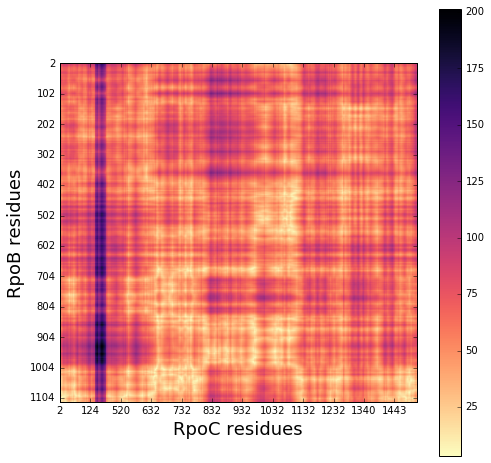

In [7]:
plt.figure('RpoBC', figsize=(8,8))
plt.imshow(distance_matrixBC, cmap='magma_r')
plt.xticks(range(0,len(rpoC_residue),100), [sorted(rpoC_residue.keys())[x] for x in range(0,len(rpoC_residue),100)])
plt.yticks(range(0,len(rpoB_residue),100), [sorted(rpoB_residue.keys())[x] for x in range(0,len(rpoB_residue),100)])
plt.colorbar()
plt.xlabel('RpoC residues', size=18)
plt.ylabel('RpoB residues', size=18)

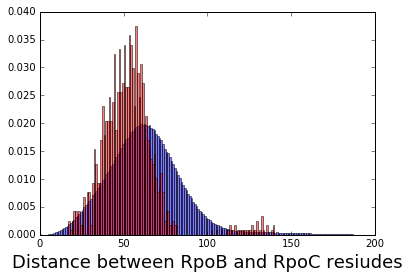

In [10]:
plt.figure()
plt.hist(distance_matrixBC.flatten(),normed=True , bins=range(200), alpha=0.5)
plt.hist(distance_matrixBC[409],normed=True , bins=range(200), color='red', alpha=0.5) #S531
plt.xlabel('Distance between RpoB and RpoC resiudes', size=18)

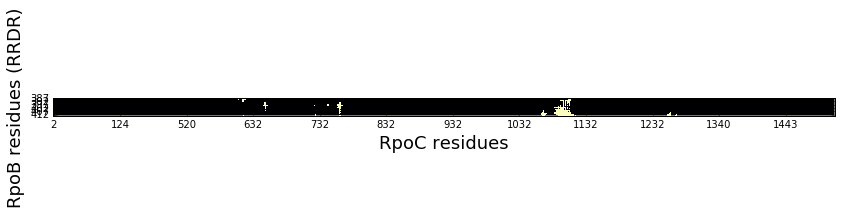

In [22]:
#Derive a binary for distance_matrixBC where distance is less than 28
distance_matrixBC2 = np.array(distance_matrixBC>28, dtype=int)
plt.figure(figsize=(14,7))
plt.imshow(distance_matrixBC2[385:412,:], cmap='magma_r', interpolation='none')
plt.xticks(range(0,len(rpoC_residue),100), [sorted(rpoC_residue.keys())[x] for x in range(0,len(rpoC_residue),100)])
plt.yticks(range(0,27,5), [sorted(rpoB_residue.keys())[385:412][x] for x in range(0,27,5)])
plt.xlabel('RpoC residues', size=18)
plt.ylabel('RpoB residues (RRDR)', size=18)

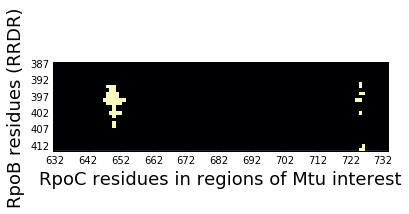

In [23]:
#Focus on RRDR and RpoC relevant region.
plt.figure()
plt.imshow(distance_matrixBC2[385:412,300:402], cmap='magma_r', interpolation='none')
plt.xticks(range(0,102,10), [sorted(rpoC_residue.keys())[300:402][x] for x in range(0,102,10)])
plt.yticks(range(0,27,5), [sorted(rpoB_residue.keys())[385:412][x] for x in range(0,27,5)])
plt.xlabel('RpoC residues in regions of Mtu interest', size=18)
plt.ylabel('RpoB residues (RRDR)', size=18)

### Escherichia coli

Based on the <a href="http://www.ncbi.nlm.nih.gov/pubmed/23620295"> Mechold et al </a> paper and their submitted structure for <em>Escherichia coli</em>: <strong>4JK1</strong>.

In [2]:
pdb_code = '4JK1'
pdb_filename = '../160229_pdb_explore/4JK1.pdb'

structure = Bio.PDB.PDBParser().get_structure(pdb_code, pdb_filename)
model = structure[0]

Note that there are two $\alpha$ subunits in RNAP, so I need to be careful.

In [17]:
distance_matrixCA = []
distance_matrixCA2 = []
distance_matrixCB = []
rpoA_residue = {}
rpoA2_residue = {}
rpoB_residue = {}
rpoC_residue = {}
for residue in model['D']:
    if residue.has_id('CA'):
        atomC = residue['CA']
        rpoC_residue[residue.get_id()[1]] = {'RESIDUE': residue.resname, 
                                             'CA_COORDINATES': residue['CA'].get_coord()}
        _atomA_dist = []
        _atomA2_dist = []
        _atomB_dist = []
        for residueA in model['A']:
            if residueA.has_id('CA'):
                atomA = residueA['CA']
                _atomA_dist.append(atomA-atomC)
                rpoA_residue[residueA.get_id()[1]] = {'RESIDUE': residueA.resname, 
                                                      'CA_COORDINATES': residueA['CA'].get_coord()}
        distance_matrixCA.append(_atomA_dist)
        
        for residueA2 in model['B']:
            if residueA2.has_id('CA'):
                atomA2 = residueA2['CA']
                _atomA2_dist.append(atomA2-atomC)
                rpoA2_residue[residueA2.get_id()[1]] = {'RESIDUE': residueA2.resname, 
                                                      'CA_COORDINATES': residueA2['CA'].get_coord()}
        distance_matrixCA2.append(_atomA2_dist)
        
        for residueB in model['C']:
            if residueB.has_id('CA'):
                atomB = residueB['CA']
                _atomB_dist.append(atomB-atomC)
                rpoB_residue[residueB.get_id()[1]] = {'RESIDUE': residueB.resname, 
                                                      'CA_COORDINATES': residueB['CA'].get_coord()}
        distance_matrixCB.append(_atomB_dist)
        
distance_matrixCA = np.array(distance_matrixCA)
distance_matrixCA2 = np.array(distance_matrixCA2)
distance_matrixCB = np.array(distance_matrixCB)

In [18]:
rpoA_residues_key = sorted(rpoA_residue.keys())
rpoA2_residues_key = sorted(rpoA2_residue.keys())
rpoB_residues_key = sorted(rpoB_residue.keys())
rpoC_residues_key = sorted(rpoC_residue.keys())

##### <strong>Based on the alignments:</strong>

- RRDR is at residues 507-533 (should be indices 499-525). Particular interest in S531, index 523)
- RpoC DPBB domain (including high density compensatory mutations) should be at residues 348-490 (should be indices 330-472). Particular interest in V483 (V408, index 390)
- RpoA compensation domain 186-203 (either 183-200 or 170-187). Particular interest in T187 (T196, index 193/180). 

In [13]:
print('RRDR\n')        
for ind,val in enumerate(sorted(rpoB_residue.keys())):
    if val == 531: 
        print('Key residue S531: %s' %ind)
        print(rpoB_residue[val])
    if val == 507:
        print('Start key region: %s' %ind)
    if val == 533:
        print('End key region: %s\n' %ind)


print('Alpha 1\n')        
for ind,val in enumerate(sorted(rpoA_residue.keys())):
    if val == 196: 
        print('Key residue T187: %s' %ind)
        print(rpoA_residue[val])
    if val == 186:
        print('Start key region: %s' %ind)
    if val == 203:
        print('End key region: %s\n' %ind)

print('Alpha 2\n')  
for ind,val in enumerate(sorted(rpoA2_residue.keys())):
    if val == 196: 
        print('Key residue T187: %s' %ind)
        print(rpoA2_residue[val])
    if val == 186:
        print('Start key region: %s' %ind)
    if val == 203:
        print('End key region: %s\n' %ind)
        
print('Beta prime\n')  
for ind,val in enumerate(sorted(rpoC_residue.keys())):
    if val == 408: 
        print('Key residue V483: %s' %ind)
        print(rpoC_residue[val])
    if val == 348:
        print('Start key region: %s' %ind)
    if val == 490:
        print('End key region: %s' %ind)

RRDR

Start key region: 499
Key residue S531: 523
{'RESIDUE': 'SER', 'CA_COORDINATES': array([-119.1780014 ,   25.00699997,   11.31299973], dtype=float32)}
End key region: 525

Alpha 1

Start key region: 183
Key residue T187: 193
{'RESIDUE': 'THR', 'CA_COORDINATES': array([-89.8239975 ,  -8.23499966, -53.44499969], dtype=float32)}
End key region: 200

Alpha 2

Start key region: 170
Key residue T187: 180
{'RESIDUE': 'THR', 'CA_COORDINATES': array([-80.75700378,  25.72400093, -21.26499939], dtype=float32)}
End key region: 187

Beta prime

Start key region: 330
Key residue V483: 390
{'RESIDUE': 'VAL', 'CA_COORDINATES': array([-71.30899811,  33.81700134, -12.16800022], dtype=float32)}
End key region: 472


Plot the distances as a heat map. Red lines delineate the RpoA region of high mutational density and the RpoC DPBB domain.

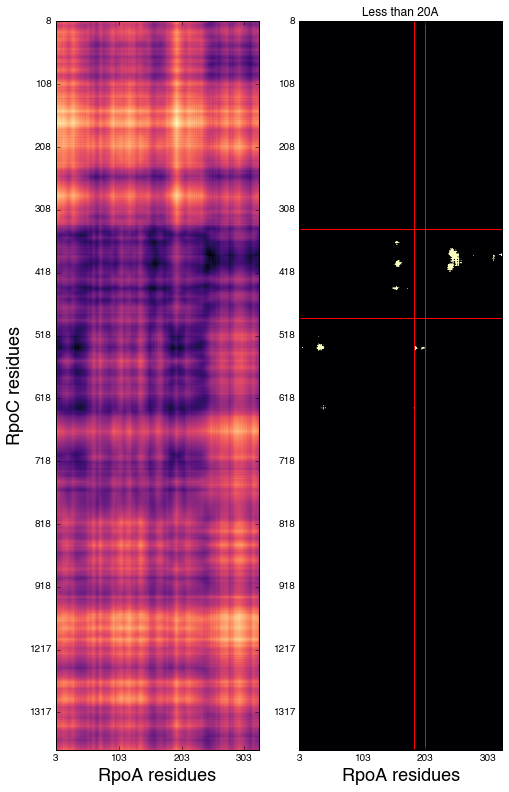

In [128]:
distance_matrixCAB = np.array(distance_matrixCA<20, dtype=int)

plt.figure('RpoCA', figsize=(8,16))
plt.subplot(121)
plt.imshow(distance_matrixCA, cmap='magma')
plt.xticks(range(0,len(rpoA_residue),100), [sorted(rpoA_residue.keys())[x] for x in range(0,len(rpoA_residue),100)])
plt.yticks(range(0,len(rpoC_residue),100), [sorted(rpoC_residue.keys())[x] for x in range(0,len(rpoC_residue),100)])
plt.xlabel('RpoA residues', size=18)
plt.ylabel('RpoC residues', size=18)
plt.subplot(122)
plt.imshow(distance_matrixCAB, cmap='magma')
plt.xticks(range(0,len(rpoA_residue),100), [sorted(rpoA_residue.keys())[x] for x in range(0,len(rpoA_residue),100)])
plt.yticks(range(0,len(rpoC_residue),100), [sorted(rpoC_residue.keys())[x] for x in range(0,len(rpoC_residue),100)])
plt.xlabel('RpoA residues', size=18)
plt.title('Less than 20A')
plt.vlines(183, 0,len(rpoC_residue)-1,colors='red',lw=1)
plt.vlines(200, 0,len(rpoC_residue)-1,colors='red',lw=1)
plt.hlines(330, 0,len(rpoA_residue)-1,colors='red',lw=1)
plt.hlines(472, 0,len(rpoA_residue)-1,colors='red',lw=1)

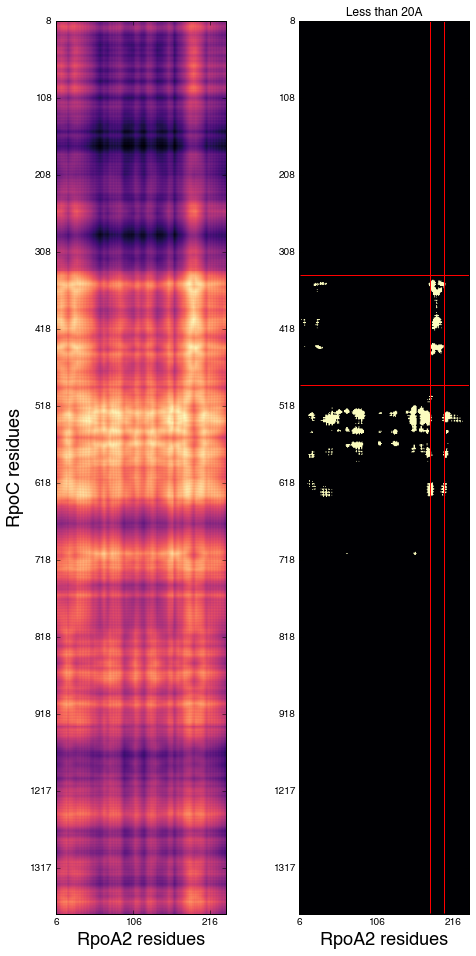

In [130]:
distance_matrixCA2B = np.array(distance_matrixCA2<20, dtype=int)

plt.figure('RpoCA2', figsize=(8,16))
plt.subplot(121)
plt.imshow(distance_matrixCA2, cmap='magma_r')
plt.xticks(range(0,len(rpoA2_residue),100), [sorted(rpoA2_residue.keys())[x] for x in range(0,len(rpoA2_residue),100)])
plt.yticks(range(0,len(rpoC_residue),100), [sorted(rpoC_residue.keys())[x] for x in range(0,len(rpoC_residue),100)])
plt.xlabel('RpoA2 residues', size=18)
plt.ylabel('RpoC residues', size=18)
plt.subplot(122)
plt.imshow(distance_matrixCA2B, cmap='magma')
plt.xticks(range(0,len(rpoA2_residue),100), [sorted(rpoA2_residue.keys())[x] for x in range(0,len(rpoA2_residue),100)])
plt.yticks(range(0,len(rpoC_residue),100), [sorted(rpoC_residue.keys())[x] for x in range(0,len(rpoC_residue),100)])
plt.xlabel('RpoA2 residues', size=18)
plt.title('Less than 20A')
plt.vlines(170, 0,len(rpoC_residue)-1,colors='red',lw=1)
plt.vlines(187, 0,len(rpoC_residue)-1,colors='red',lw=1)
plt.hlines(330, 0,len(rpoA2_residue)-1,colors='red',lw=1)
plt.hlines(472, 0,len(rpoA2_residue)-1,colors='red',lw=1)

Start by figuring out which of the two $\alpha$ subunits are closer to the $\beta$'.

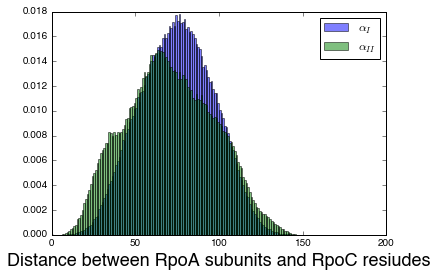

In [37]:
plt.figure()
plt.hist(distance_matrixCA.flatten(),normed=True , bins=range(200), alpha=0.5, label=r'$\alpha_I$')
plt.hist(distance_matrixCA2.flatten(),normed=True , bins=range(200), alpha=0.5, label=r'$\alpha_{II}$')
plt.xlabel('Distance between RpoA subunits and RpoC resiudes', size=18)
plt.legend()

Cool, a bimodal distribution for $\alpha_{II}$... Clearly this is the same $\alpha_{II}$ referred to by Song et al. Just to make sure, let's look at the distance between the V483 and the two T187 residues.

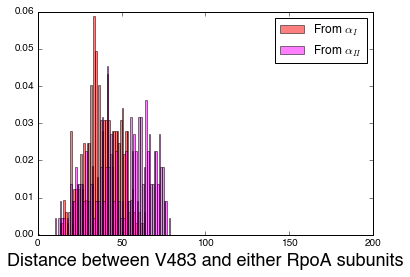

In [36]:
plt.figure()
plt.hist(distance_matrixCA[390],normed=True , bins=range(200), 
         color='red', alpha=0.5, label=r'From $\alpha_I$') #V483
plt.hist(distance_matrixCA2[390],normed=True , bins=range(200), 
         color='magenta', alpha=0.5, label=r'From $\alpha_{II}$') #V483
plt.xlabel('Distance between V483 and either RpoA subunits', size=18)
plt.legend()

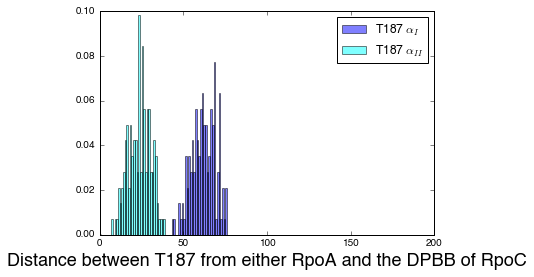

In [131]:
plt.figure()
plt.hist(distance_matrixCA[330:472,193],normed=True , bins=range(200), 
         color='blue', alpha=0.5, label=r'T187 $\alpha_I$') #T187
plt.hist(distance_matrixCA2[330:472,180],normed=True , bins=range(200), 
         color='cyan', alpha=0.5, label=r'T187 $\alpha_{II}$') #T187_2
plt.xlabel('Distance between T187 from either RpoA and the DPBB of RpoC', size=18)
plt.legend()

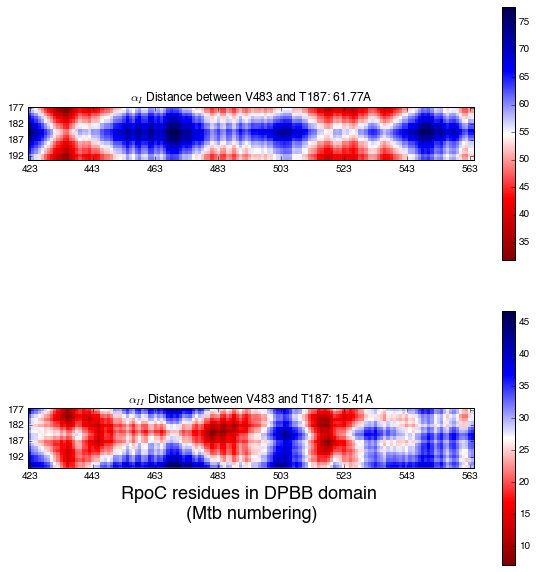

In [141]:
#Focus on DPBB and RpoA relevant region.
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.imshow(distance_matrixCA.T[183:200,330:472], cmap='seismic_r', interpolation='none')
plt.xticks(range(0,142,20), [sorted(rpoC_residue.keys())[330:472][x]+75 for x in range(0,142,20)])
plt.yticks(range(0,17,5), [sorted(rpoA_residue.keys())[183:200][x]-9 for x in range(0,17,5)])
plt.colorbar()
#plt.ylabel('RpoA residues in regions of high \ncompensation interest', size=18)
plt.title(r'$\alpha_{I}$ Distance between V483 and T187: %.2fA' %distance_matrixCA[390,193])
plt.subplot(212)
plt.imshow(distance_matrixCA2.T[170:189,330:472], cmap='seismic_r', interpolation='none')
plt.xticks(range(0,142,20), [sorted(rpoC_residue.keys())[330:472][x]+75 for x in range(0,142,20)])
plt.yticks(range(0,17,5), [sorted(rpoA2_residue.keys())[170:189][x]-9 for x in range(0,17,5)])
plt.colorbar()
plt.xlabel('RpoC residues in DPBB domain \n(Mtb numbering)', size=18)
plt.title(r'$\alpha_{II}$ Distance between V483 and T187: %.2fA' %distance_matrixCA2[390,180])

Clearly $\alpha_{II}$ is the reason for the acumulation of the mutations in RpoA. The next question is, are the distances between DPBB and high density RpoA region particularly smaller than the rest of the protein? Based on the whole protein figures above they should.

Ttest_indResult(statistic=-94.040771260805968, pvalue=0.0)

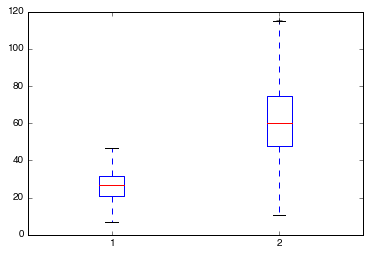

In [138]:
#Whole DPBB domain
rpoAC2_key_distances = distance_matrixCA2[330:472, 170:189].flatten()
rpoAC2_notkey_distances = np.concatenate((distance_matrixCA2[:330, 170:189].flatten(), 
                                          distance_matrixCA2[472:, 170:189].flatten()))
plt.boxplot([rpoAC2_key_distances, rpoAC2_notkey_distances])
ss.ttest_ind(rpoAC2_key_distances, rpoAC2_notkey_distances)

Ttest_indResult(statistic=-41.864789671764406, pvalue=0.0)

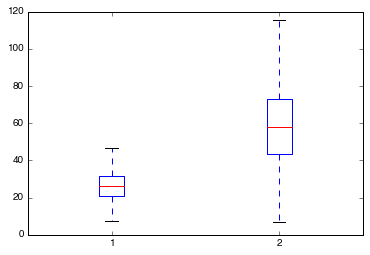

In [137]:
#High density portion of RpoC
rpoAC2_key_distances = distance_matrixCA2[359:399, 170:189].flatten()
rpoAC2_notkey_distances = np.concatenate((distance_matrixCA2[:359, 170:189].flatten(), 
                                          distance_matrixCA2[399:, 170:189].flatten()))
plt.boxplot([rpoAC2_key_distances, rpoAC2_notkey_distances])
ss.ttest_ind(rpoAC2_key_distances, rpoAC2_notkey_distances)

OK, however we define these it is clear that the regions of mutation accumulation in RpoA and RpoC are close together just as reported by Comas et al, and Song et al. The next step is really to use logistic regression to determine weather this is specifically associated with proximity to the exit tunnel as suggested by Song. 

The next step will then also be to determine weather or not this has anything to do with S531L or weather it is universal.

Another question is weather or not this is likely to mean that these mutations are mutually exclusive? I would expect network analysis to be useful here - nodes that are highly connected in physical space would be less well connected in fitness space?